<a href="https://colab.research.google.com/github/risan-raja/sdpiit/blob/main/notebooks/XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install https://s3-us-west-2.amazonaws.com/xgboost-nightly-builds/release_1.6.0/xgboost-1.6.1%2Ba55d3bdde2042b3cd866d3e64dab4dff6c344798-py3-none-manylinux2014_x86_64.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://s3-us-west-2.amazonaws.com/xgboost-nightly-builds/release_1.6.0/xgboost-1.6.1%2Ba55d3bdde2042b3cd866d3e64dab4dff6c344798-py3-none-manylinux2014_x86_64.whl (192.9 MB)


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import (
    Binarizer,
    StandardScaler,
    LabelBinarizer,
    OneHotEncoder,
)
from sklearn.linear_model import LogisticRegression
# from sklearnex import patch_sklearn

# patch_sklearn()
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.neural_network import MLPClassifier
# import dtale
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

sns.set()
pd.options.display.max_columns = 50
pd.options.plotting.backend = "matplotlib"
from sklearn import set_config

set_config(display="diagram")
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    MinMaxScaler,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import warnings
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore")
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
    GradientBoostingClassifier,
)
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    # StratifiedGroupKFold,

    StratifiedKFold,
)

from sklearn.naive_bayes import BernoulliNB, CategoricalNB, MultinomialNB, ComplementNB, GaussianNB
from sklearn.model_selection import cross_validate
nb_est = [CategoricalNB(), MultinomialNB(), ComplementNB(), GaussianNB()]
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.tree import export_graphviz, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from xgboost import XGBClassifier
from joblib import parallel_backend
import sklearn.metrics

In [8]:
dtype_info = {
    "v_1": "Binary",
    "v_26": "Binary",
    "v_11": "Binary",
    "v_14": "Binary",
    "v_30": "Binary",
    "v_28": "Binary",
    "v_9": "Binary",
    "v_27": "Binary",
    "v_32": "Nominal",
    "v_4": "Nominal",
    "v_3": "Nominal",
    "v_20": "Nominal",
    "v_21": "Nominal",
    "v_18": "Nominal",
    "v_25": "Nominal",
    "v_12": "Nominal",
    "v_31": "Ordinal",
    "v_15": "Ordinal",
    "v_19": "Ordinal",
    "v_13": "Ordinal",
    "v_33": "Ordinal",
    "v_17": "Ordinal",
    "v_29": "Ordinal",
    "v_23": "Ordinal",
    "v_6": "Ordinal",
    "v_24": "Ordinal",
    "v_10": "Ordinal",
    "v_5": "Ordinal",
    "v_22": "Ordinal",
    "v_0": "Ordinal",
    "v_16": "Ratio",
    "v_2": "Ratio",
    "v_8": "Ratio",
    "v_7": "Ratio",
    "v_39": "Ratio",
    "v_37": "Ratio",
    "v_38": "Ratio",
    "v_34": "Ratio",
    "v_40": "Ratio",
    "v_36": "Ratio",
    "v_35": "Ratio",
}
data = pd.read_csv('sdpiit/data/train.csv',index_col=0,)
ordinal = [i for i in dtype_info if dtype_info[i] == "Ordinal"]
nominal = [i for i in dtype_info if dtype_info[i] == "Nominal"]
binary = [i for i in dtype_info if dtype_info[i] == "Binary"]
ratio = [i for i in dtype_info if dtype_info[i] == "Ratio"]
def categorise_data(data):
    ordinal_data = data.loc[:, ordinal]
    nominal_data = data.loc[:, nominal]
    binary_data = data.loc[:, binary]
    ratio_data = data.loc[:, ratio]
    return ordinal_data, nominal_data, binary_data, ratio_data
ordinal_data, nominal_data, binary_data, ratio_data = categorise_data(data)
def gen_train_test(data, p):
    Y = data.label
    X_2= Y_2 = Y[Y==2].index
    X_0= Y_0 = Y[Y==0].index
    X_1= Y_1 = Y[Y==1].index
    train_size = int(p*Y_2.shape[0])
    test_size = int((1-p)*Y_2.shape[0])
    
    train_idx_2 = np.random.choice(Y_2,(train_size,))
    train_idx_1 = np.random.choice(Y_1,(train_size,))
    train_idx_0 = np.random.choice(Y_0,(train_size,))
    train_idx = np.r_[train_idx_0, train_idx_1,train_idx_2]
    # train_idx.shape

    test_idx_2 = np.random.choice(np.setdiff1d(Y_2, train_idx_2),(test_size,))
    test_idx_1 = np.random.choice(np.setdiff1d(Y_1, train_idx_1),(test_size,))
    test_idx_0 = np.random.choice(np.setdiff1d(Y_0, train_idx_0),(test_size,))
    test_idx = np.r_[test_idx_0, test_idx_1,test_idx_2]
    # test_idx.shape
    return train_idx, test_idx


In [16]:
data['label'].loc[1]

2

100%|██████████| 100/100 [00:54<00:00,  1.84it/s]


373

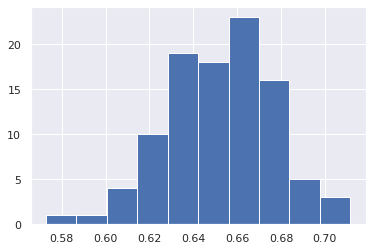

In [9]:
results = []

n_runs = 100
r_max = -100
r_max_data = None
for _ in tqdm(range(100)):

    train_idx, test_idx = gen_train_test(data,0.8)
    X_train, y_train = ordinal_data.loc[train_idx,:].astype('int'), data["label"].loc[train_idx]
    X_test, y_test = ordinal_data.loc[test_idx,:].astype('int'), data["label"].loc[test_idx]

    dtc= RandomForestClassifier(n_jobs=-1,random_state=42, criterion='entropy', min_samples_leaf=4)
    wf = make_pipeline(dtc)
    with parallel_backend('threading',n_jobs=10):
        wf.fit(X_train, y_train)
        wf.score(X_test, y_test)
        r = sklearn.metrics.f1_score(wf.predict(X_test), y_test, average='macro')
        if r > r_max:
            r_max =r
            r_max_data = (train_idx, test_idx)
        results.append(r)
results.sort()
plt.hist(results)
import gc
gc.collect()
# print(r)

In [11]:
train_idx, test_idx = r_max_data

In [16]:
# from scipy._lib.six import X
with parallel_backend('threading', n_jobs=-1):
    clf=XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None,
                enable_categorical=False, gamma=None, gpu_id=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, monotone_constraints=None,
                n_estimators=100, n_jobs=-1, num_parallel_tree=20,
                objective='multi:softmax', predictor=None, random_state=None,
                reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
                subsample=None,tree_method='gpu_hist', use_label_encoder=False,
                validate_parameters=None, verbosity=2)
    X_train, y_train = ordinal_data.loc[train_idx,:], data.label.loc[train_idx]
    X_test, y_test = ordinal_data.loc[test_idx,:], data.label.loc[test_idx]
    clf.fit(X_train, y_train)
    clf.save_model("sdpiit/data/categorical-model.json")

In [17]:
r = sklearn.metrics.f1_score(clf.predict(X_test), y_test, average='macro')
clf
r

0.6880005931510564

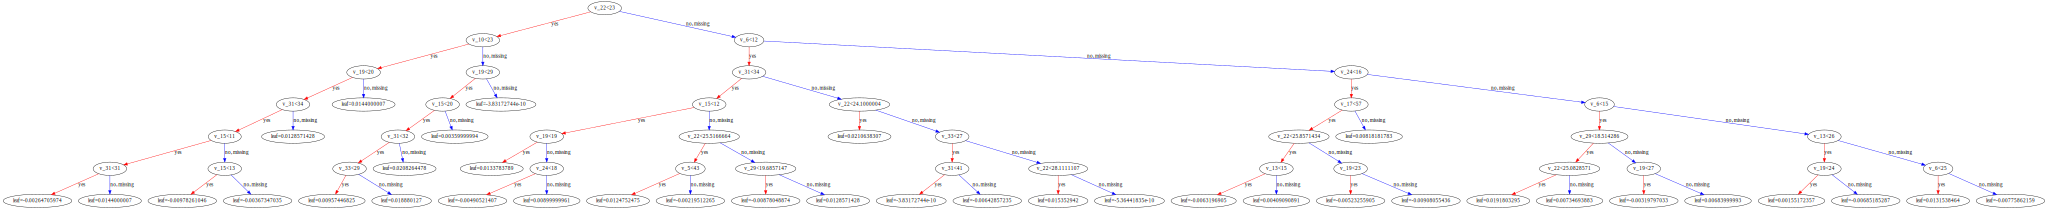

In [20]:
import xgboost
xgboost.to_graphviz(clf)